**PyTorch Networks**

---

This exercise will be about convolutional neural networks and the *PyTorch* framework. In this exercise you will use a machine learning framework widely used nowadays and the main idea is for you to have a first contact with this library and it's modules. In this exercise we will use the [**CIFAR-10**](https://www.cs.toronto.edu/~kriz/cifar.html) dataset, which contains 32x32 colour images divided in 10 classes. Your task is to use PyTorch functions to build a network to correctly classify the dataset images.


**7.1 PyTorch Tutorial \[5\]**

---


This first task is to make you have an initial background to be able to do the task 2. Pytorch is widely used and thanks to that there are many tutorials to introduce you to it's modules and functions. For your first task you should do [this](https://pytorch.org/tutorials/beginner/basics/intro.html) official pytorch tutorial. Don't worry, you don't have to submit the tutorial solved, but to finish the second task you will need to learn what is explained in this tutorial.

Take the most of it, because the next assignments will also be related to pytorch, so take this time to learn about pytorch.

Tutorial Notbeook: 
https://colab.research.google.com/drive/1Yqqjb5RTvmto6cbvD3BjJ66AxwtUTliU?usp=sharing

**7.2 Building your model \[5\]**

---

Your second task is to build a model able to achieve 70% of accuracy on the CIFAR-10 dataset. Pytorch has many networks already implemented on it, but you should implement it on your own. On *network.py* there is an initial network implemented, your task will be to modify this file to build your model. 

## You can add or remove layers, change parameters (*in_features*, *out_features*, *kernel_size*), add different layers, etc. Note that you are not stricted to the layers already used on this file, feel free to look over the internet to have ideas about possible architectures that you use. Your final goal is to achieve at least *70%* of accuracy on the **validation set** with your model.

Notes (Dump): https://www.asquero.com/article/different-types-of-neural-network-architecture/



In [1]:
#!pip3 install torch
#!pip3 install torchvision
from core import *
from trainer import Trainer
from network import Net
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In the file *trainer.py* there is *Trainer* class implemented, which will deal with the network training, gradients calculation and parameters updates. Feel free to take a look and see how it's done on *PyTorch*. Then, the function *get_dataloader()* method will get the **CIFAR-10** images already splitted on training and validation sets, returning two *dataloaders*.

In [2]:
batch_size = 256

# create the CIFAR-10 dataloaders
train_loader, val_loader = get_dataloader(batch_size, torchvision.datasets.CIFAR10)


Files already downloaded and verified
Files already downloaded and verified


By using the default network you probably will get something around *55~60%* of accuracy only on the **validation set**, try to run the next cell without changing the *network.py*. Your task is to modify the *network.py* file to build your own model, and get at least *70%* of accuracy on the **validation set**. You can also change the *lr* and *epochs* parameters.

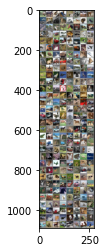

[epoch: 0, it: 50] Loss: 2.094649033546448
[epoch: 0, it: 100] Loss: 1.7182042908668518
[epoch: 0, it: 150] Loss: 1.539044280052185


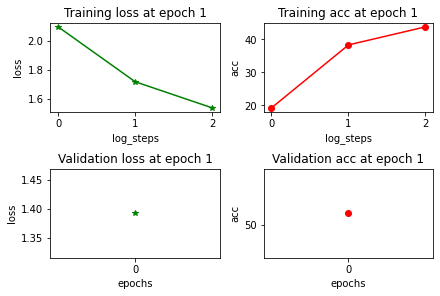

[epoch: 1, it: 50] Loss: 1.347570550441742
[epoch: 1, it: 100] Loss: 1.2856343007087707
[epoch: 1, it: 150] Loss: 1.2522386384010316


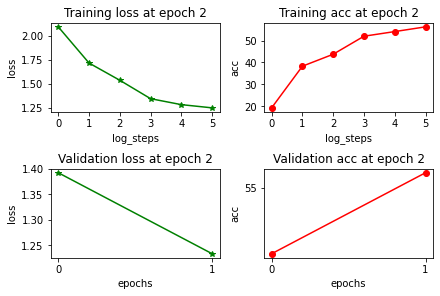

[epoch: 2, it: 50] Loss: 1.149589822292328
[epoch: 2, it: 100] Loss: 1.1220221853256225
[epoch: 2, it: 150] Loss: 1.08205637216568


In [ ]:
# epochs is already defined in core.py
lr = 0.001
#a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.
epochs = 10
net = Net()
trainer = Trainer(epochs=epochs, lr=lr, net=net, train_loader=train_loader, val_loader=val_loader)

trainer.train()
_, acc = trainer.validation(True)
print(f'Accuracy of the network on the validation images: {acc}')

trainer.save_model() # Save Model

After finishing the training, the *Trainer* will save your network trained weights on the file *model_weights.pt* which can be used to load the trained network.


* First 

In [ ]:
net = Net()
load_model = torch.load('model_weights.pt')
net.load_state_dict(load_model)

trainer = Trainer(epochs=epochs, lr=lr, net=net, train_loader=train_loader, val_loader=val_loader)
_, acc = trainer.validation(True)
print(f'Accuracy of the network on the validation images: {acc}')